In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
wage_gap_csv = pd.read_csv('salaries_per_title_and_gender.csv')

[Text(0, 0, 'Technique Leader'),
 Text(1, 0, 'Staff'),
 Text(2, 0, 'Senior Staff'),
 Text(3, 0, 'Senior Engineer'),
 Text(4, 0, 'Manager'),
 Text(5, 0, 'Engineer'),
 Text(6, 0, 'Assistant Engineer')]

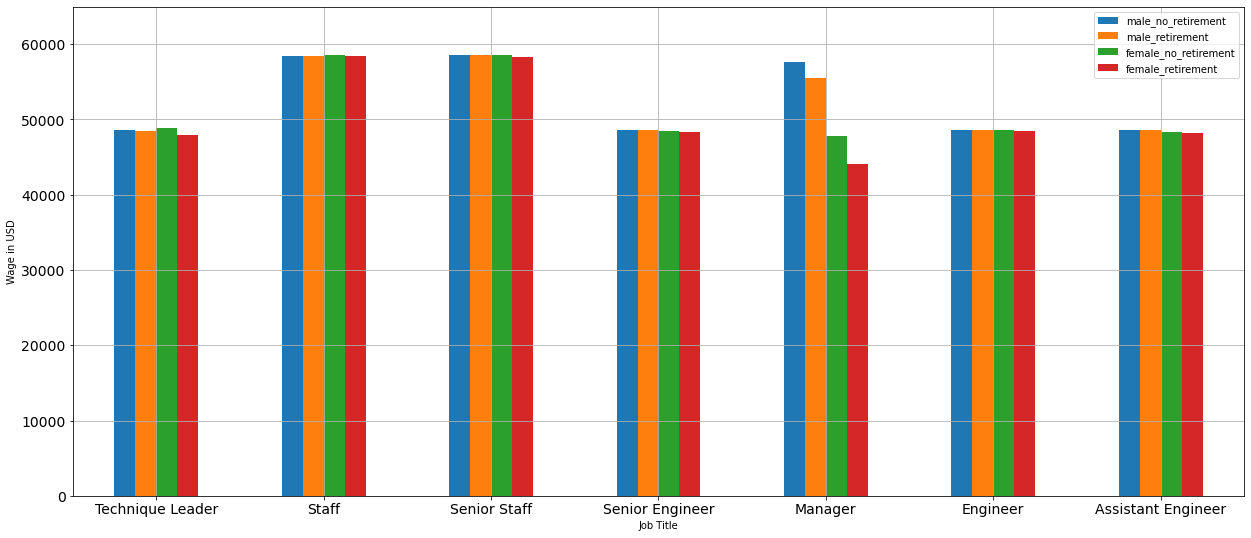

In [4]:
wage_gap_csv.plot(
    kind = 'bar', 
    figsize = (21,9), 
    grid = True,
    yticks = [i * 10000 for i in range(0,7,1)],
    ylim = (0,65000),
    ylabel = 'Wage in USD',
    xlim = (-.5,6.5),
    xlabel = "Job Title",
    rot = 'horizontal',
    fontsize = 14,
).set_xticklabels(wage_gap_csv.title, rotation=0)

In [6]:
retirement_titles_df = pd.read_csv('retirement_titles.csv')
retirement_titles_df

,emp_no,first_name,last_name,title,from_date,to_date
0,10001,Georgi,Facello,Senior Engineer,1986-06-26,9999-01-01
1,10004,Chirstian,Koblick,Engineer,1986-12-01,1995-12-01
2,10004,Chirstian,Koblick,Senior Engineer,1995-12-01,9999-01-01
3,10005,Kyoichi,Maliniak,Senior Staff,1996-09-12,9999-01-01
4,10005,Kyoichi,Maliniak,Staff,1989-09-12,1996-09-12
...,...,...,...,...,...,...
133771,499986,Nathan,Ranta,Staff,1985-08-11,1992-08-11
133772,499989,Keiichiro,Lindqvist,Senior Staff,1996-10-29,2001-03-07
133773,499994,Navin,Argence,Engineer,1993-02-22,1993-10-27
133774,499996,Zito,Baaz,Engineer,1996-05-13,2002-05-13


In [7]:
unique_titles_df = pd.read_csv('unique_titles.csv')
unique_titles_df

,emp_no,first_name,last_name,title
0,10001,Georgi,Facello,Senior Engineer
1,10004,Chirstian,Koblick,Senior Engineer
2,10005,Kyoichi,Maliniak,Senior Staff
3,10006,Anneke,Preusig,Senior Engineer
4,10009,Sumant,Peac,Senior Engineer
...,...,...,...,...
72453,499966,Mihalis,Crabtree,Senior Staff
72454,499981,Yunming,Mitina,Senior Staff
72455,499983,Uri,Juneja,Senior Staff
72456,499986,Nathan,Ranta,Senior Staff


In [8]:
retiring_titles_df = pd.read_csv('retiring_titles.csv')
retiring_titles_df

,count,title
0,25916,Senior Engineer
1,24926,Senior Staff
2,9285,Engineer
3,7636,Staff
4,3603,Technique Leader
5,1090,Assistant Engineer
6,2,Manager


In [9]:
mentorship_elegible_df = pd.read_csv('mentorship_eligibilty.csv')
mentorship_elegible_df

,emp_no,first_name,last_name,birth_date,from_date,to_date,title
0,10095,Hilari,Morton,1965-01-03,1994-03-10,9999-01-01,Staff
1,10122,Ohad,Esposito,1965-01-19,1998-08-06,9999-01-01,Technique Leader
2,10291,Dipayan,Seghrouchni,1965-01-23,1987-03-30,9999-01-01,Senior Staff
3,10476,Kokou,Iisaka,1965-01-01,1987-09-20,9999-01-01,Senior Staff
4,10663,Teunis,Noriega,1965-01-09,1999-02-12,9999-01-01,Technique Leader
...,...,...,...,...,...,...,...
1544,498845,Arumugam,Pelc,1965-01-09,1999-11-13,9999-01-01,Senior Engineer
1545,498955,Nechama,Kandlur,1965-01-13,1995-01-16,9999-01-01,Engineer
1546,499194,Padma,Delgrange,1965-01-29,1999-08-27,9999-01-01,Senior Staff
1547,499260,Danae,Honglei,1965-01-11,1998-09-14,9999-01-01,Engineer


In [42]:
dept_count_df = pd.read_csv('dept_count.csv')
dept_count_df.set_index(dept_count_df.dept_name, inplace = True)

retired_count_df = pd.read_csv('retired_dept_count.csv')
retired_count_df.set_index(retired_count_df.dept_name, inplace = True)

mentor_count_df = pd.read_csv('mentor_dept_count.csv')
mentor_count_df.set_index(mentor_count_df.dept_name, inplace = True)


In [55]:
Dept_Analysis_DF = pd.DataFrame({
    'Total Count' : dept_count_df["count"],
    'Retirement Employees' : retired_count_df["count"],
    'Remaining Employees' : dept_count_df["count"] - retired_count_df["count"],
    'Available Mentors' : mentor_count_df["count"],
    'Mentees per Mentor' : (retired_count_df["count"] / mentor_count_df["count"]).apply(np.ceil) 
})
Dept_Analysis_DF["Mentees per Mentor"] = Dept_Analysis_DF["Mentees per Mentor"].map('{:,.0f}'.format)
Dept_Analysis_DF

,Total Count,Retirement Employees,Remaining Employees,Available Mentors,Mentees per Mentor
dept_name,,,,,
Customer Service,17569,5320,12249,120,45
Development,61386,18368,43018,396,47
Finance,12437,3759,8678,64,59
Human Resources,12898,3925,8973,97,41
Marketing,14842,4392,10450,117,38
Production,53304,16172,37132,322,51
Quality Management,14546,4448,10098,86,52
Research,15441,4738,10703,103,46
Sales,37701,11336,26365,244,47


In [59]:
Employees_Gender_DF = pd.read_csv('employees_by_gender.csv')
Employees_Gender_DF

,gender,all_gender_count,retired_gender_count
0,M,144114,43428
1,F,96010,29030


In [60]:
Salaries_Title_Gender_DF = pd.read_csv('salaries_per_title_and_gender.csv')
Salaries_Title_Gender_DF

,title,male_no_retirement,male_retirement,female_no_retirement,female_retirement
0,Technique Leader,48611.65,48478.57,48863.91,47941.17
1,Staff,58480.27,58397.05,58529.66,58367.54
2,Senior Staff,58501.07,58525.69,58606.84,58240.83
3,Senior Engineer,48542.56,48590.44,48493.26,48289.09
4,Manager,57665.11,55574.00,47798.67,44105.75
5,Engineer,48555.61,48539.84,48560.75,48435.96
6,Assistant Engineer,48588.90,48604.48,48381.71,48237.59
